In [ ]:
# Importing necessary libraries
import re
import nltk
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Loading dataset from a URL into a DataFrame
df = pd.read_csv("/content/Reviews.csv")

In [ ]:
# Displaying the first few rows of the dataset
df.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [ ]:
# Displaying the shape of the dataset (number of rows and columns)
df.shape

(2304, 3)

In [ ]:
# Checking for null values in the dataset and summing them up column-wise
df.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [ ]:
# Counting the frequency of each rating
ratings = df["Rating"].value_counts()

# Extracting the unique ratings and their counts
numbers = ratings.index
quantity = ratings.values

# Defining custom colors for the pie chart
custom_colors = px.colors.qualitative.Pastel

# Importing Plotly Express
import plotly.express as px

# Creating a pie chart to visualize the distribution of ratings
figure = px.pie(df,
                values=quantity,  # Using the counts as values
                color_discrete_sequence=custom_colors,  # Setting custom colors
                names=numbers,  # Using the ratings as labels
                hole=0.7)  # Setting the size of the hole in the middle of the pie chart

# Displaying the pie chart
figure.show()

In [ ]:
# Downloading the stopwords corpus from NLTK
nltk.download('stopwords')

# Initializing a Snowball stemmer for English
stemmer = nltk.SnowballStemmer("english")

# Setting the stopwords for English
stopword = set(stopwords.words('english'))

# Defining a function to clean text data
def clean(text):
    # Convert text to lowercase
    text = str(text).lower()
    # Remove square brackets and their contents
    text = re.sub('\[.*?\]', '', text)
    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove newline characters
    text = re.sub('\n', '', text)
    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)
    # Remove stopwords
    text = [word for word in text.split(' ') if word not in stopword]
    # Join the cleaned words back into a single string
    text = " ".join(text)
    # Stemming: Reduce words to their base or root form
    text = [stemmer.stem(word) for word in text.split(' ')]
    # Join the stemmed words back into a single string
    text = " ".join(text)
    return text

# Applying the clean function to the "Review" column of the DataFrame
df["Review"] = df["Review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Displaying the first few rows of the DataFrame
df.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around backup bi...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5


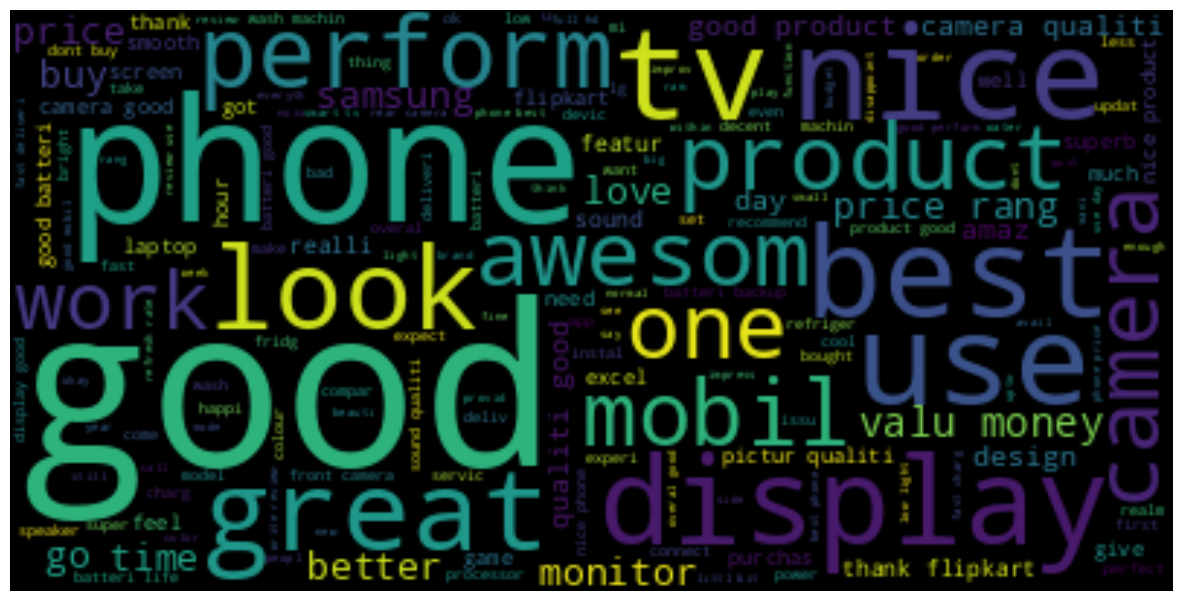

In [ ]:
# Concatenating all cleaned review texts into a single string
text = " ".join(i for i in df.Review)

# Creating a set of stopwords using the built-in STOPWORDS in WordCloud
stopwords = set(STOPWORDS)

# Generating a WordCloud object with specified parameters
wordcloud = WordCloud(stopwords=stopwords,  # Set of stopwords to ignore
                      background_color="black"  # Background color of the WordCloud
                      ).generate(text)  # Generating the WordCloud from the concatenated text

# Plotting the WordCloud
plt.figure(figsize=(15, 10))  # Setting the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Displaying the WordCloud with bilinear interpolation
plt.axis("off")  # Turning off the axis
plt.show()  # Showing the WordCloud

In [ ]:
# Downloading the VADER lexicon from NLTK
nltk.download('vader_lexicon')

# Initializing the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Calculating sentiment scores for each review in the "Review" column
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]

# Selecting relevant columns ("Review", "Positive", "Negative", "Neutral")
df = df[["Review", "Positive", "Negative", "Neutral"]]

# Displaying the first few rows of the DataFrame
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,Positive,Negative,Neutral
0,best great performancei got around backup bi...,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000


In [ ]:
# Calculating the total sum of positive sentiment scores
x = sum(df["Positive"])

# Calculating the total sum of negative sentiment scores
y = sum(df["Negative"])

# Calculating the total sum of neutral sentiment scores
z = sum(df["Neutral"])

In [ ]:
def sentiment_score(a, b, c):
    # Checking if the total sum of positive sentiment scores is greater than both negative and neutral scores
    if (a > b) and (a > c):
        print("Positive 😊")
    # Checking if the total sum of negative sentiment scores is greater than both positive and neutral scores
    elif (b > a) and (b > c):
        print("Negative 😠")
    # If neither of the above conditions is true, the sentiment is considered neutral
    else:
        print("Neutral 🙂")

# Calling the sentiment_score function with the total sum of sentiment scores as arguments
sentiment_score(x, y, z)

Neutral 🙂


In [ ]:
# printing out the total sums of positive, negative, and neutral sentiment scores
print("Positive:", x)
print("Negative:", y)
print("Neutral:", z)

Positive: 923.5529999999985
Negative: 96.77500000000013
Neutral: 1283.6880000000006
